Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [11]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [12]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
# Step 1: Handle Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Fill missing values or drop rows/columns as needed
# Example: Fill missing values with the median for numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)


Missing Values:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


<ipython-input-14-cc06506238a3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [15]:
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    z_scores = np.abs(stats.zscore(numeric_df))
    threshold = 3  # Common threshold for outliers
    df = df[(z_scores < threshold).all(axis=1)]

In [16]:
df_final = df.copy()

# Check if numeric columns are present after removing outliers
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(numeric_df)
    df_scaled = pd.DataFrame(scaled_values, columns=numeric_df.columns)

    # If you want to keep non-numerical columns, concatenate them back
    non_numerical_df = df.select_dtypes(exclude=[np.number])
    df_final = pd.concat([non_numerical_df.reset_index(drop=True), df_scaled.reset_index(drop=True)], axis=1)
else:
    print("No numerical data available for scaling. Returning original DataFrame.")

# Display the final preprocessed dataset
print("\nFinal Preprocessed Data:")
print(df_final.head())


Final Preprocessed Data:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.766325 -0.523260   -0.158869  -0.755664        0.0        0.0   
1 -1.765460 -0.667084   -0.158869  -0.755664        0.0        0.0   
2 -1.764596 -0.309747   -0.158869  -0.755664        0.0        0.0   
3 -1.763731 -0.739295   -0.158869  -0.755664        0.0        0.0   
4 -1.762866  0.601746   -0.158869   1.517591        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.779029    -1.147142          -0.401822        -0.431775   
1    -0.776768    -1.025933          -0.401822        -0.431775   
2    -0.561235    -0.783516          -0.401822        -0.431775   
3    -0.761050    -1.147142          -0.401822        -0.431775   
4     1.599448     1.883076           2.859455         1.768005   

   Days_since_enroll    Award?  
0           1.431438 -0.718093  
1           1.415848 -0.718093  
2           1.448002 -0.718093  
3           1.4080

EDA

In [17]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
df.info

<bound method DataFrame.info of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3630 rows x 12 columns]>

In [19]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.0,3630.0,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,2043.135813,60519.392562,39.584573,1.997245,1.0,1.0,14299.180716,10.464187,255.907438,0.785124,4061.804408,0.340220
std,1156.308525,61882.862343,249.199005,1.319875,0.0,0.0,18134.266531,8.251370,636.954758,1.818614,2052.901389,0.473848
min,1.000000,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1054.250000,17481.000000,0.000000,1.000000,1.0,1.0,1000.000000,3.000000,0.000000,0.000000,2284.000000,0.000000
50%,2054.500000,39220.000000,0.000000,1.000000,1.0,1.0,5894.500000,11.000000,0.000000,0.000000,4022.000000,0.000000
75%,3041.750000,82121.500000,0.000000,3.000000,1.0,1.0,21631.250000,16.000000,150.000000,1.000000,5715.750000,1.000000
max,4021.000000,370941.000000,2454.000000,5.000000,1.0,1.0,89360.000000,39.000000,4652.000000,12.000000,8296.000000,1.000000


In [20]:
df.isnull()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [22]:
df.isnull().sum().sum()

0

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
ID#                  0
Balance              0
Qual_miles 

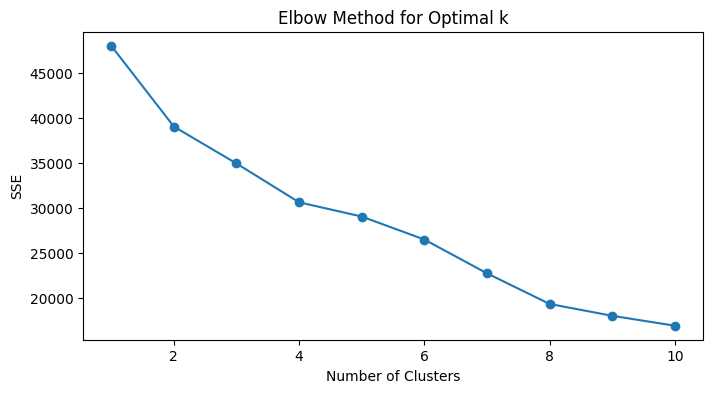

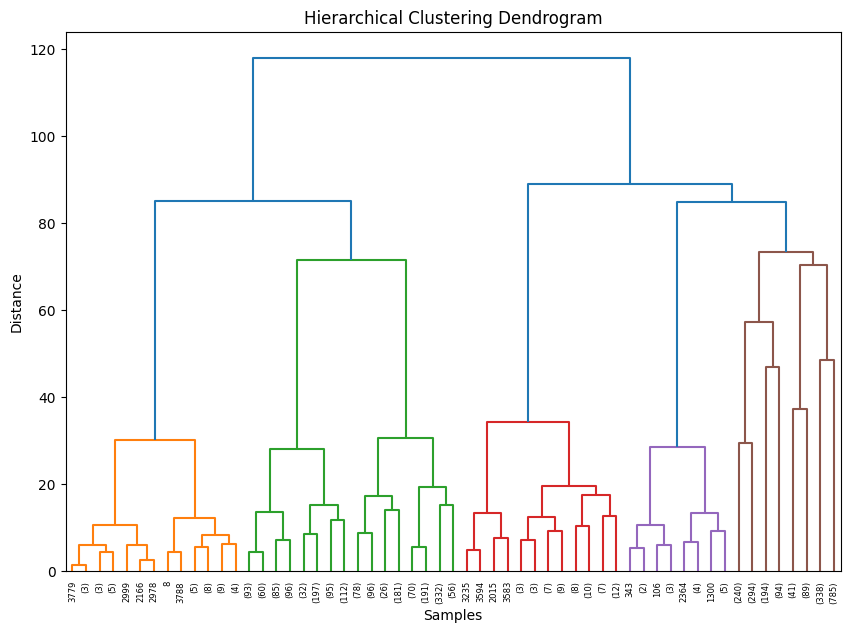

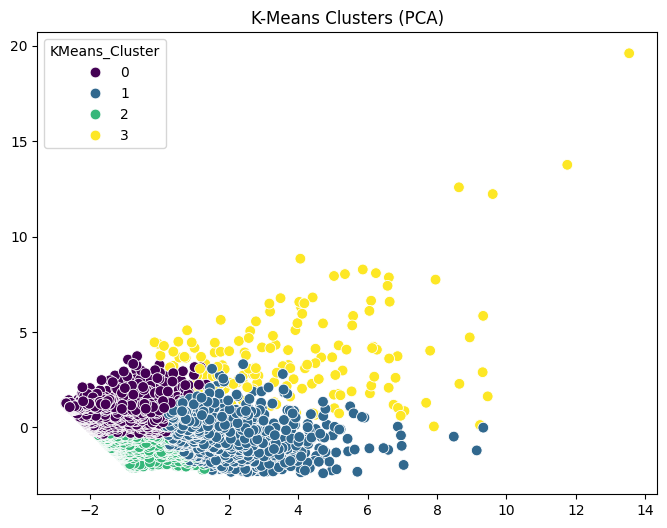

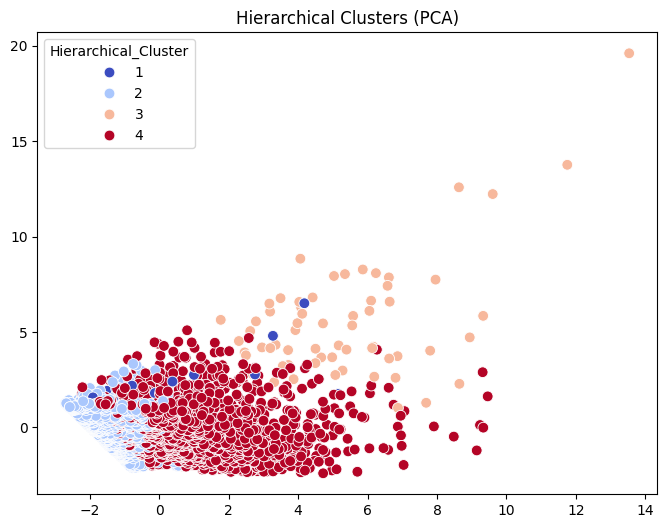

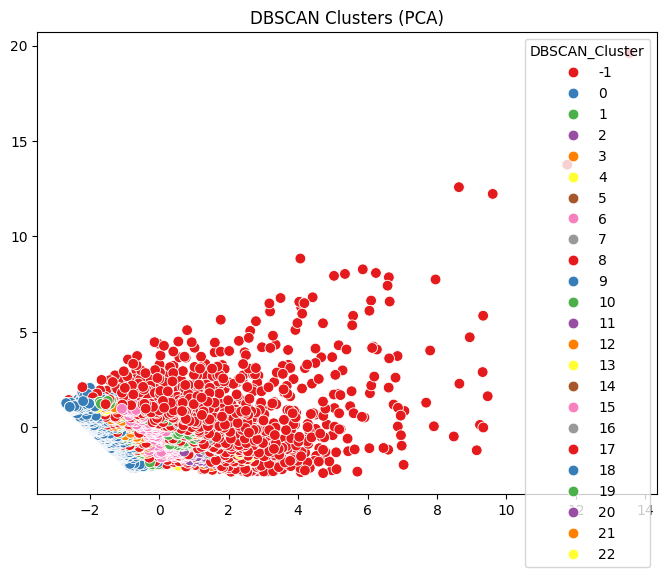

   KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster
0               2                     2               0
1               2                     2               0
2               2                     2               0
3               2                     2               0
4               1                     4              -1


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# Load the dataset
file_path = r"/content/EastWestAirlines.csv"
df = pd.read_csv(file_path)

# Inspect the data
print(df.head())

# Step 1: Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Drop missing values or impute as required
df.dropna(inplace=True)

# Assuming we are clustering on numerical columns only, select numerical data
numerical_data = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Step 2: K-Means Clustering
# Using the Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Fit K-Means with optimal k (assume k=4 from Elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['KMeans_Cluster'] = kmeans_labels

# Step 3: Hierarchical Clustering
# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Choose a cut-off distance to form clusters
hierarchical_labels = fcluster(linked, t=4, criterion='maxclust')
df['Hierarchical_Cluster'] = hierarchical_labels

# Step 4: DBSCAN Clustering
# Fit DBSCAN with appropriate parameters (epsilon, min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
df['DBSCAN_Cluster'] = dbscan_labels

# Step 5: PCA for Visualization (Optional)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot clusters for K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['KMeans_Cluster'], palette='viridis', s=60)
plt.title('K-Means Clusters (PCA)')
plt.show()

# Plot clusters for Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Hierarchical_Cluster'], palette='coolwarm', s=60)
plt.title('Hierarchical Clusters (PCA)')
plt.show()

# Plot clusters for DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['DBSCAN_Cluster'], palette='Set1', s=60)
plt.title('DBSCAN Clusters (PCA)')
plt.show()

# Print the cluster assignments
print(df[['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']].head())


In [27]:
df.dropna(inplace=True)
numerical_data = df.select_dtypes(include=[np.number])

In [28]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if applicable)
df.dropna(inplace=True)


ID#                     0
Balance                 0
Qual_miles              0
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles             0
Bonus_trans             0
Flight_miles_12mo       0
Flight_trans_12         0
Days_since_enroll       0
Award?                  0
KMeans_Cluster          0
Hierarchical_Cluster    0
DBSCAN_Cluster          0
dtype: int64


In [29]:
# Select only numerical columns for clustering
numerical_data = df.select_dtypes(include=[np.number])

# Check if there are any numerical columns after filtering
print(numerical_data.shape)


(3999, 15)


•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Insights (K-Means Clustering):

Each cluster is centered around specific values for the features, which define the characteristics of that cluster. For example:
Cluster 1 may consist of customers with low flight mileage but high loyalty points.
Cluster 2 may have high flight activity and low loyalty, indicating frequent flyers who may not have been long-term customers.

K-Means Clustering Analysis:
K-Means generates clusters by minimizing within-cluster variance, assuming the clusters are spherical in shape.
We can analyze the cluster centroids (mean of the features within each cluster) to understand the key characteristics of each cluster.
Insights can also be gained by comparing the distribution of key features across clusters.